In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris    # load iris data from datasets in sklearn
%matplotlib inline

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
data = pd.DataFrame(iris.data, columns = iris['feature_names'])

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
# Adding target and flowers_name columns to data
data['target'] = iris.target
data['flowers_name'] = data.target.apply(lambda x: iris.target_names[x])   #by using data.target column, insert values into flowers_name column

In [12]:
data.iloc[0:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [13]:
df = data.drop(['target','flowers_name'], axis = 'columns')            

In [14]:
from sklearn.model_selection import train_test_split       
X_train, X_test, y_train, y_test = train_test_split(df, data.target,test_size = 0.3)    #train our data dividing data into train and test data

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
model.score(X_test,y_test)

0.9555555555555556

In [18]:
y_predicted = model.predict(X_test)

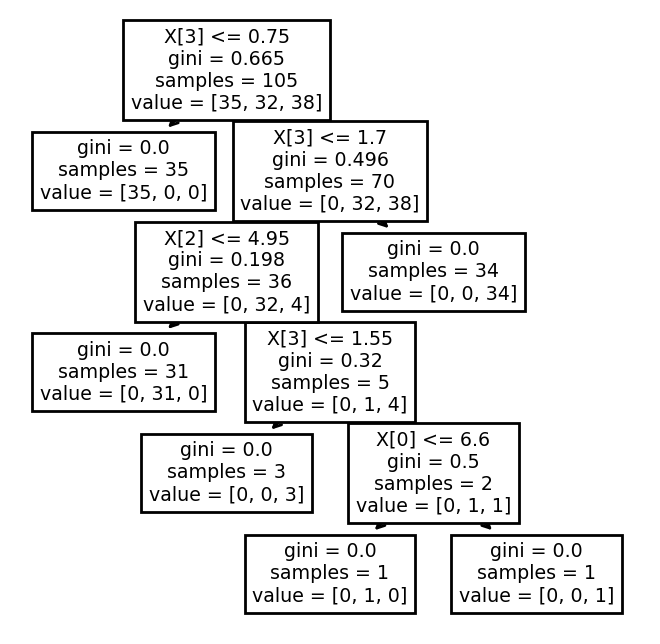

In [19]:
from sklearn import tree

fig, axes  =plt.subplots(nrows= 1, ncols = 1,figsize = (4,4), dpi = 200)
tree.plot_tree(model)   #we can visualize decision tree by tree.plot_tree function
fig.savefig("simple_decision_tree.png")

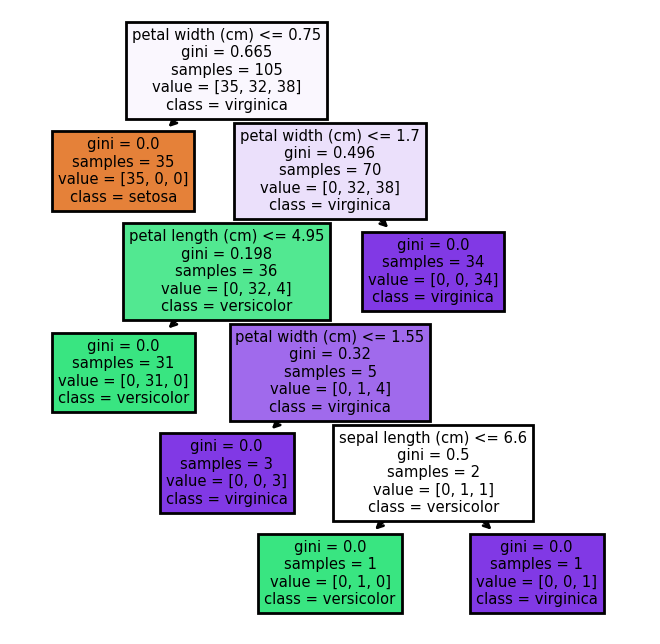

In [27]:
# But the above picture looks not easy to interpret, let's add some feature names and class in it

fn = list(iris.feature_names)
cn = list(iris.target_names)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True)

fig.savefig('decision_tree.png')

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

<AxesSubplot:>

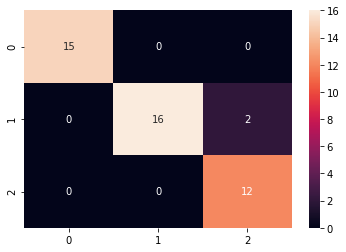

In [22]:
#ploting heatmap to visualize confusion matrix of y_test and y_predicted
sns.heatmap(cm, annot = True)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

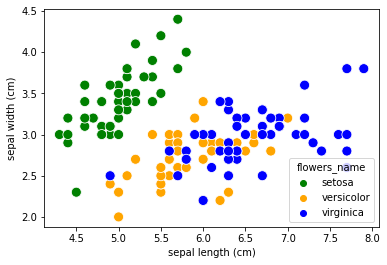

In [23]:
sns.scatterplot(x = 'sepal length (cm)',y = 'sepal width (cm)', hue = data['flowers_name'], data = df, palette=['green','orange','blue'],s = 100)


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

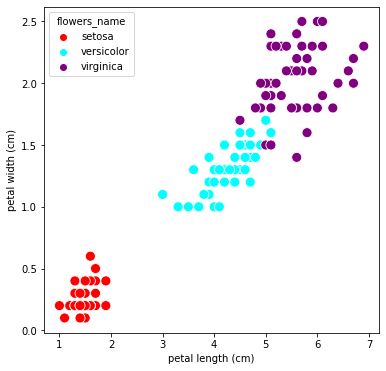

In [24]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'petal length (cm)',y = 'petal width (cm)', hue = data['flowers_name'], data = df, palette=['red','cyan','purple'],s = 100,)


In [25]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error:", mean_absolute_error(y_test,y_predicted))

Mean absolute error: 0.044444444444444446
